In [1]:
# dataframe opertations - pandas
import sys
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(397, 1)
              value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


<AxesSubplot:title={'center':'Electric Production'}, xlabel='DATE'>

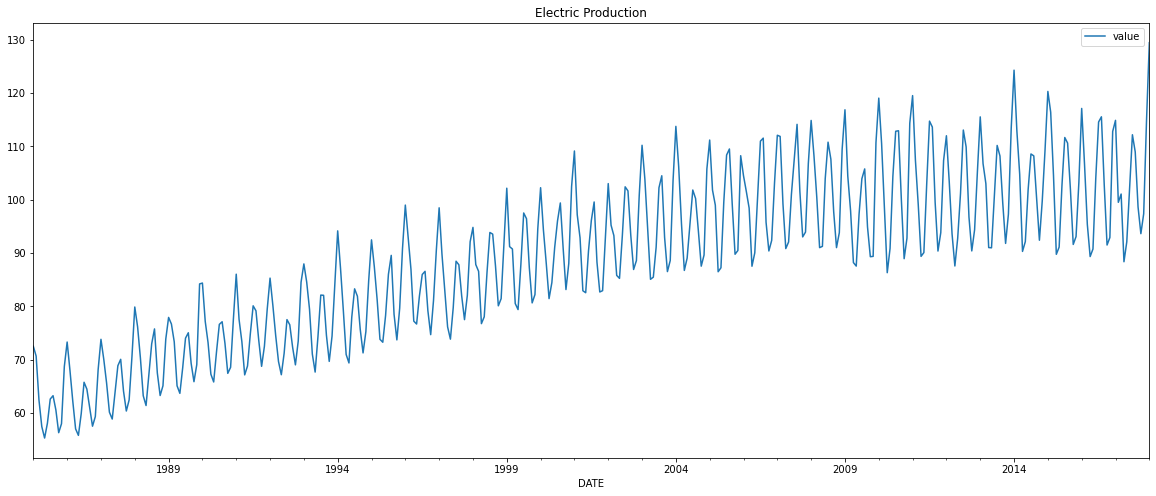

In [2]:
Electirc = pd.read_csv(r'E:\Fifth year ESC Rennes\Time Series Analysis\group project\Electric_Production.csv',index_col='DATE', parse_dates=True)
Electric = pd.read_csv(r'E:\Fifth year ESC Rennes\Time Series Analysis\group project\Electric_Production.csv',index_col='DATE', parse_dates=True)
# finding shape of the dataframe
print(Electric.shape)
# having a look at the data
print(Electric.head())
#visitors ['no_of_visits'].fillna(value= visitors ['no_of_visits'].mean(), inplace=True)
#import seaborn as sns
#sns.boxplot(x= visitors ['no_of_visits'])
#calculating the z score
#visitors [‘z_score’] = visitors. 'no_of_visits' - visitors. 'no_of_visits'.mean())/visitors. 'no_of_visits'.std(ddof=0)
#exclude the rowl with z score more than 3
#visitors [(np.abs(stats.zscore(visitors [‘z_score’])) < 3)]
#re-sampling the data to monthly buckets
#visitors.set_index('date', inplace=True)
#visitors.resample('MS').sum()
# plotting the original data
Electric[['value']].plot(title='Electric Production',figsize=(20,8))

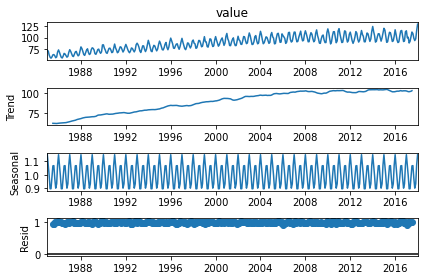

In [3]:
decompose_result = seasonal_decompose(Electric['value'],model='multiplicative')
decompose_result.plot();

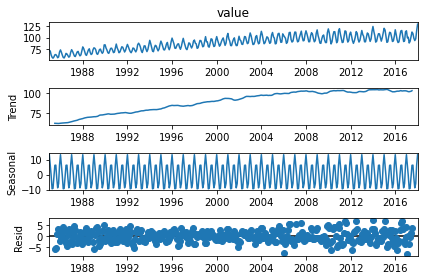

In [4]:
decompose_result = seasonal_decompose(Electric['value'],model='additive')
decompose_result.plot();

In [5]:
# Set the frequency of the date time index as Monthly start as indicated by the data
Electric.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha=0.8
#alpha = 1/(2*m)

E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Electric Single Exponential Smoothing'}, xlabel='DATE'>

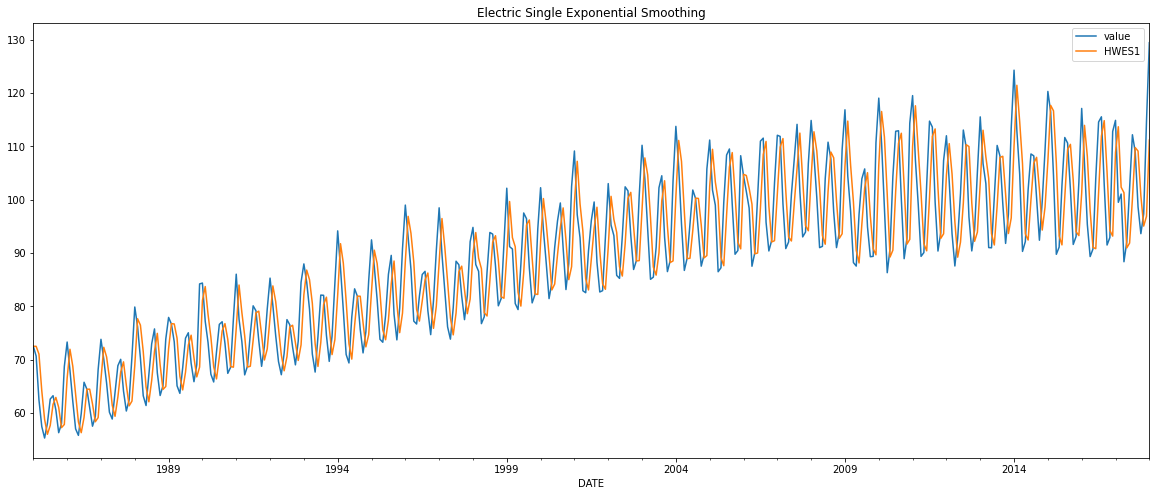

In [6]:
Electric['HWES1'] = SimpleExpSmoothing(Electric['value']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
Electric[['value','HWES1']].plot(title='Electric Single Exponential Smoothing',figsize=(20,8))

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(Electric.value,Electric.HWES1)}')
print(f'Mean Squared Error = {mean_squared_error(Electric.value,Electric.HWES1)}')

Mean Absolute Error = 7.055007434845792
Mean Squared Error = 68.85055151955102


In [8]:
Electric.head(5)

,value,HWES1
DATE,,
1985-01-01,72.5052,72.505200
1985-02-01,70.6720,72.505200
1985-03-01,62.4502,71.038640
1985-04-01,57.4714,64.167888
1985-05-01,55.3151,58.810698


E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Electric Double Exponential Smoothing: Multiplicative Trend'}, xlabel='DATE'>

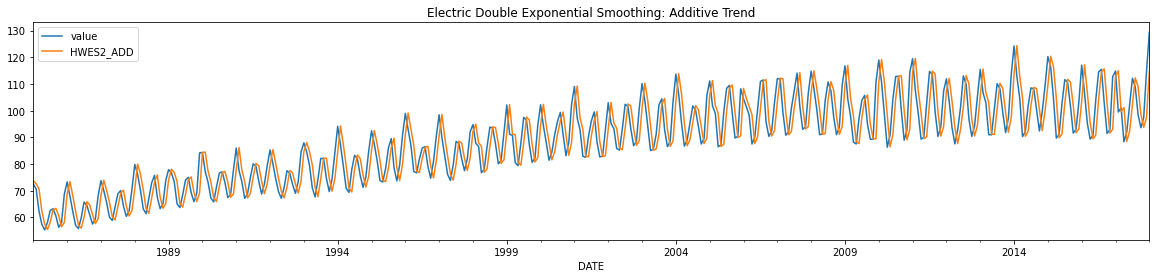

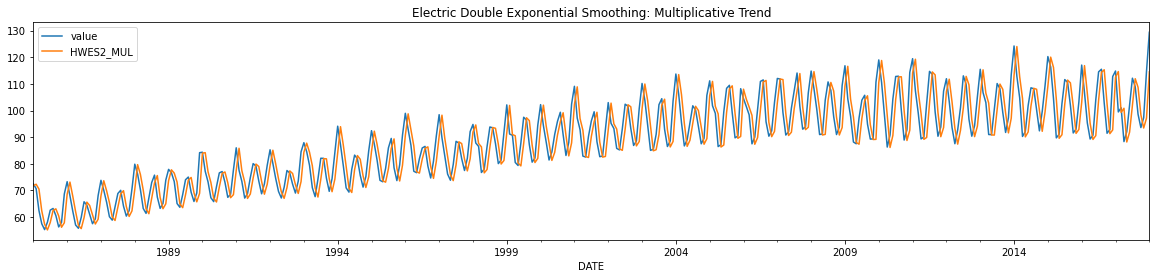

In [9]:
Electric['HWES2_ADD'] = ExponentialSmoothing(Electric['value'],trend='add').fit().fittedvalues
Electric['HWES2_MUL'] = ExponentialSmoothing(Electric['value'],trend='mul').fit().fittedvalues
Electric[['value','HWES2_ADD']].plot(title='Electric Double Exponential Smoothing: Additive Trend',figsize=(20,4))
Electric[['value','HWES2_MUL']].plot(title='Electric Double Exponential Smoothing: Multiplicative Trend',figsize=(20,4))

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(Electric.value,Electric.HWES2_ADD)}')
print(f'Mean Squared Error = {mean_squared_error(Electric.value,Electric.HWES2_ADD)}')
print(f'Mean Absolute Error = {mean_absolute_error(Electric.value,Electric.HWES2_MUL)}')
print(f'Mean Squared Error = {mean_squared_error(Electric.value,Electric.HWES2_MUL)}')

Mean Absolute Error = 6.574601488851855
Mean Squared Error = 59.99818924614991
Mean Absolute Error = 6.5665254285909125
Mean Squared Error = 59.98817126253285


E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Electric Double Exponential Smoothing: Multiplicative Seasonality'}, xlabel='DATE'>

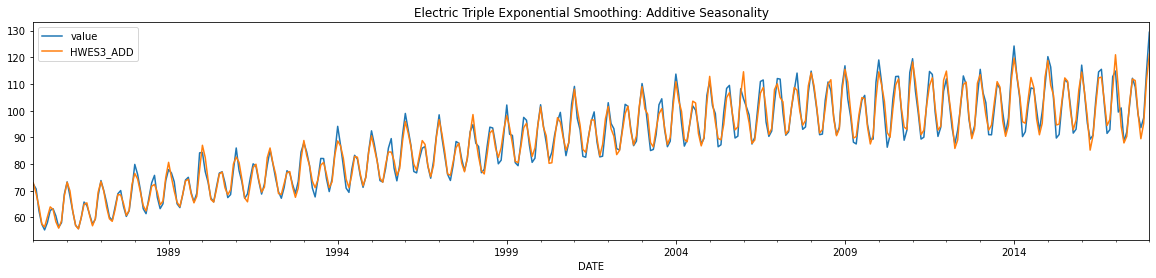

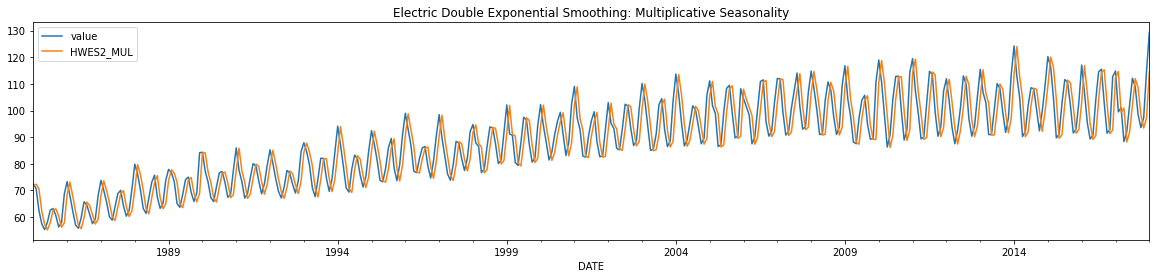

In [11]:
Electric['HWES3_ADD'] = ExponentialSmoothing(Electric['value'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
Electric['HWES3_MUL'] = ExponentialSmoothing(Electric['value'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
Electric[['value','HWES3_ADD']].plot(title='Electric Triple Exponential Smoothing: Additive Seasonality',figsize=(20,4))
Electric[['value','HWES2_MUL']].plot(title='Electric Double Exponential Smoothing: Multiplicative Seasonality',figsize=(20,4))

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(Electric.value,Electric.HWES3_ADD)}')
print(f'Mean Squared Error = {mean_squared_error(Electric.value,Electric.HWES3_ADD)}')
print(f'Mean Absolute Error = {mean_absolute_error(Electric.value,Electric.HWES3_MUL)}')
print(f'Mean Squared Error = {mean_squared_error(Electric.value,Electric.HWES3_MUL)}')

Mean Absolute Error = 1.9490681659043623
Mean Squared Error = 6.358176668010918
Mean Absolute Error = 1.830024101655661
Mean Squared Error = 5.626169788917239


In [17]:
forecast_data = pd.read_csv(r'E:\Fifth year ESC Rennes\Time Series Analysis\group project\Electric_Production.csv',index_col='DATE', parse_dates=True)

forecast_data.index.freq = 'MS'
# Split into train and test set
train_Electric = forecast_data[:258]
test_Electric = forecast_data[258:]

E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

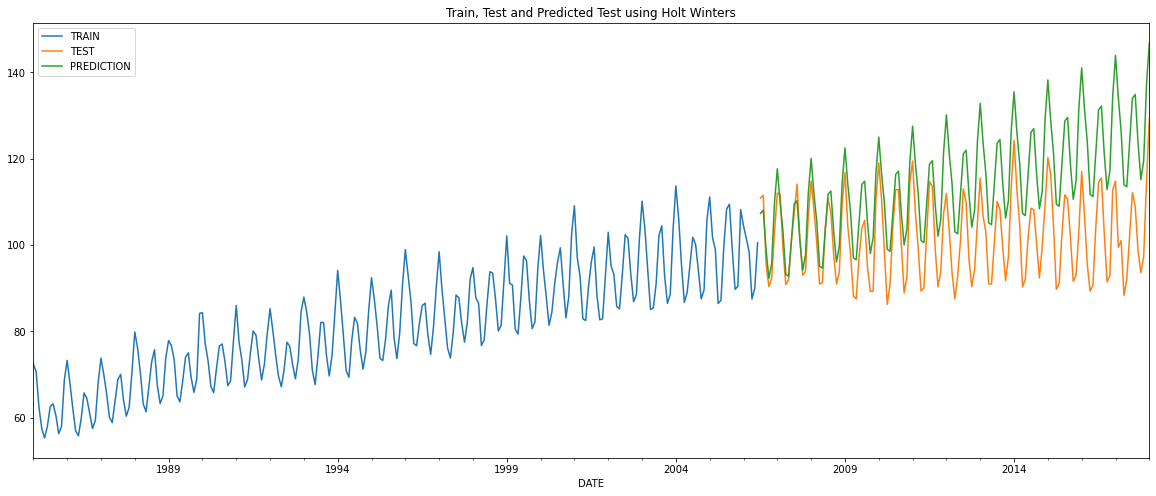

In [18]:
fitted_model = ExponentialSmoothing(train_Electric['value'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(397-258)
train_Electric['value'].plot(legend=True,label='TRAIN')
test_Electric['value'].plot(legend=True,label='TEST',figsize=(20,8))
test_predictions.plot(legend=True,label='PREDICTION')

plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='DATE'>

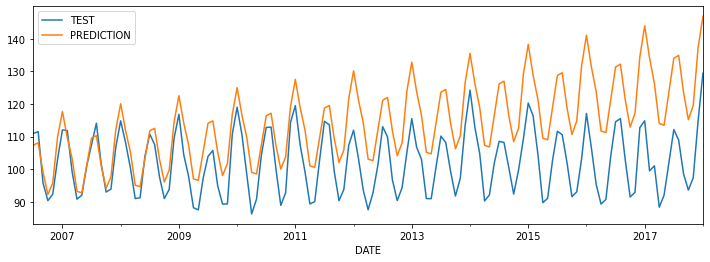

In [19]:
test_Electric['value'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION')

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_Electric,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_Electric,test_predictions)}')

Mean Absolute Error = 12.576584861066141
Mean Squared Error = 212.2088232903787


In [21]:
fitted_model.predict(start = 396,end = 432)
aaa=fitted_model.predict(start = 396,end = 432)

<AxesSubplot:title={'center':'Electric Single Exponential Smoothing'}, xlabel='DATE'>

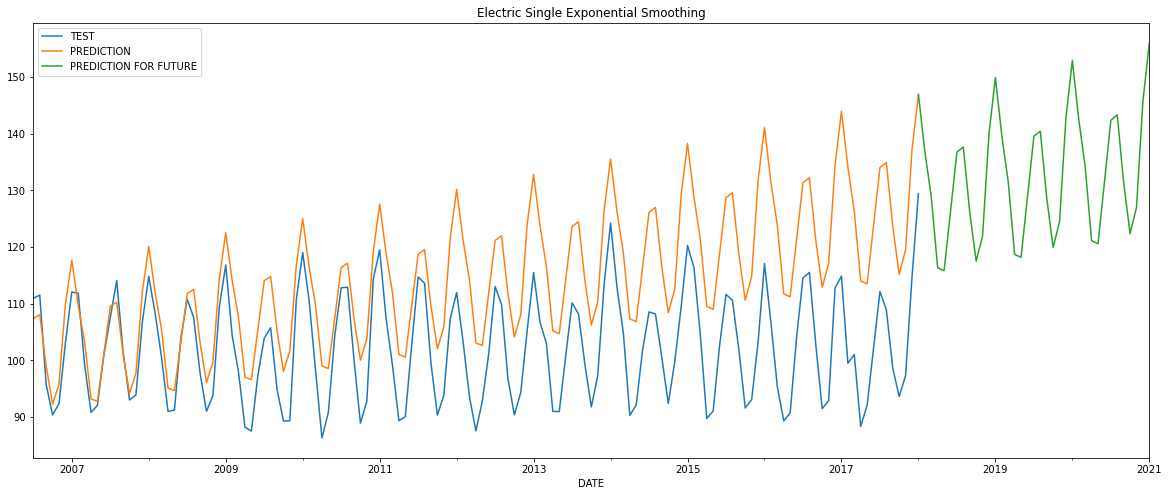

In [23]:
test_Electric['value'].plot(legend=True,label='TEST',figsize=(20,8))
test_predictions.plot(legend=True,label='PREDICTION')

aaa.plot(title='Electric Single Exponential Smoothing',figsize=(20,8),legend=True,label='PREDICTION FOR FUTURE')